# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 54.8 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

In [6]:
df_hh_income.head()

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667


In [7]:
df_pct_poverty.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [8]:
df_pct_completed_hs.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [9]:
df_share_race_city.head()


,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [10]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [11]:
# What is the shape of the DataFrames?

print(df_hh_income.shape)
print(df_pct_poverty.shape)
print(df_pct_completed_hs.shape)
print(df_share_race_city.shape)
print(df_fatalities.shape)

(29322, 3)
(29329, 3)
(29329, 3)
(29268, 7)
(2535, 14)


In [12]:
# How many rows and columns do they have?
print(f'{df_hh_income.shape[0]} rows and {df_hh_income.shape[1]} columns in df_hh_income')
print(f'{df_pct_poverty.shape[0]} rows and {df_pct_poverty.shape[1]} columns in df_pct_poverty')
print(f'{df_pct_completed_hs.shape[0]} rows and {df_pct_completed_hs.shape[1]} columns in df_pct_completed_hs')
print(f'{df_share_race_city.shape[0]} rows and {df_share_race_city.shape[1]} columns in df_share_race_city')
print(f'{df_fatalities.shape[0]} rows and {df_fatalities.shape[1]} columns in df_fatalities')


29322 rows and 3 columns in df_hh_income
29329 rows and 3 columns in df_pct_poverty
29329 rows and 3 columns in df_pct_completed_hs
29268 rows and 7 columns in df_share_race_city
2535 rows and 14 columns in df_fatalities


In [13]:
# What are the column names?
print(df_hh_income.columns)
print(df_pct_poverty.columns)
print(df_pct_completed_hs.columns)
print(df_share_race_city.columns)
print(df_fatalities.columns)


Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [14]:
# Are there any NaN values?
print(df_hh_income.isnull().sum())
print(df_pct_poverty.isnull().sum())
print(df_pct_completed_hs.isnull().sum())
print(df_share_race_city.isnull().sum())
print(df_fatalities.isnull().sum())


Geographic Area     0
City                0
Median Income      51
dtype: int64
Geographic Area    0
City               0
poverty_rate       0
dtype: int64
Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64
Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64
id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64


In [16]:
# Are there any duplicates?
print(df_hh_income.duplicated().sum())
print(df_pct_poverty.duplicated().sum())
print(df_pct_completed_hs.duplicated().sum())
print(df_share_race_city.duplicated().sum())
print(df_fatalities.duplicated().sum())


0
0
0
0
0


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [17]:
# Sort the dataframe by poverty rate in descending order
df_pct_poverty_sorted = df_pct_poverty.sort_values(by=['poverty_rate'], ascending=False)

# Create a bar chart
fig = px.bar(df_pct_poverty_sorted, x='Geographic Area', y='poverty_rate',
             title='Poverty Rate by US State',
             labels={'Geographic Area': 'State', 'poverty_rate': 'Poverty Rate (%)'},
             height=600)

# Customize the layout
fig.update_layout(xaxis_tickangle=-45)

# Show the chart
fig.show()



In [18]:
# Find the state with the highest poverty rate
highest_poverty_state = df_pct_poverty_sorted.iloc[0]['Geographic Area']
print(f"The state with the highest poverty rate is: {highest_poverty_state}")


The state with the highest poverty rate is: FL


In [19]:
# Find the state with the lowest poverty rate
lowest_poverty_state = df_pct_poverty_sorted.iloc[-1]['Geographic Area']
print(f"The state with the lowest poverty rate is: {lowest_poverty_state}")


The state with the lowest poverty rate is: PA


# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [20]:
# Sort the dataframe by high school graduation rate in ascending order
df_pct_completed_hs_sorted = df_pct_completed_hs.sort_values(by=['percent_completed_hs'], ascending=True)

# Create a bar chart
fig = px.bar(df_pct_completed_hs_sorted, x='Geographic Area', y='percent_completed_hs',
             title='High School Graduation Rate by US State',
             labels={'Geographic Area': 'State', 'percent_completed_hs': 'High School Graduation Rate (%)'},
             height=600)

# Customize the layout
fig.update_layout(xaxis_tickangle=-45)

# Show the chart
fig.show()


# Find the state with the lowest high school graduation rate
lowest_hs_grad_state = df_pct_completed_hs_sorted.iloc[0]['Geographic Area']
print(f"The state with the lowest high school graduation rate is: {lowest_hs_grad_state}")


# Find the state with the highest high school graduation rate
highest_hs_grad_state = df_pct_completed_hs_sorted.iloc[-1]['Geographic Area']
print(f"The state with the highest high school graduation rate is: {highest_hs_grad_state}")


The state with the lowest high school graduation rate is: MO
The state with the highest high school graduation rate is: HI


# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [7]:
import plotly.graph_objects as go
import pandas as pd

# Read the CSV files, try encoding with 'latin-1'
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding='iso-8859-1')
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding='iso-8859-1')

# Convert the 'poverty_rate' and 'percent_completed_hs' columns to numeric, forcing errors to NaN
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')

# Drop rows with NaN values in either 'poverty_rate' or 'percent_completed_hs'
df_pct_poverty.dropna(subset=['poverty_rate'], inplace=True)
df_pct_completed_hs.dropna(subset=['percent_completed_hs'], inplace=True)

# Aggregate data by 'Geographic Area' (state) by calculating the mean poverty rate and HS completion rate per state
df_poverty_by_state = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().reset_index()
df_hs_by_state = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().reset_index()

# Merge the aggregated data on 'Geographic Area' (state)
merged_df = pd.merge(df_poverty_by_state, df_hs_by_state, on='Geographic Area')

# Create the figure
fig = go.Figure()

# Add the first trace for poverty rate
fig.add_trace(go.Scatter(x=merged_df['Geographic Area'], y=merged_df['poverty_rate'],
                    mode='lines+markers',
                    name='Poverty Rate',
                    yaxis='y1'))

# Add the second trace for high school graduation rate
fig.add_trace(go.Scatter(x=merged_df['Geographic Area'], y=merged_df['percent_completed_hs'],
                    mode='lines+markers',
                    name='High School Graduation Rate',
                    yaxis='y2'))

# Update the layout with dual y-axes
fig.update_layout(
    title="Poverty Rate vs. High School Graduation Rate by State",
    xaxis_title="State",
    yaxis=dict(
        title="Poverty Rate (%)",
        titlefont=dict(color="#1f77b4"),
        tickfont=dict(color="#1f77b4")
    ),
    yaxis2=dict(
        title="High School Graduation Rate (%)",
        titlefont=dict(color="#d62728"),
        tickfont=dict(color="#d62728"),
        anchor="x",
        overlaying="y",
        side="right"
    ),
    xaxis=dict(
        tickangle=-45  # Rotate x-axis labels to avoid overlap
    )
)

# Show the plot
fig.show()


#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

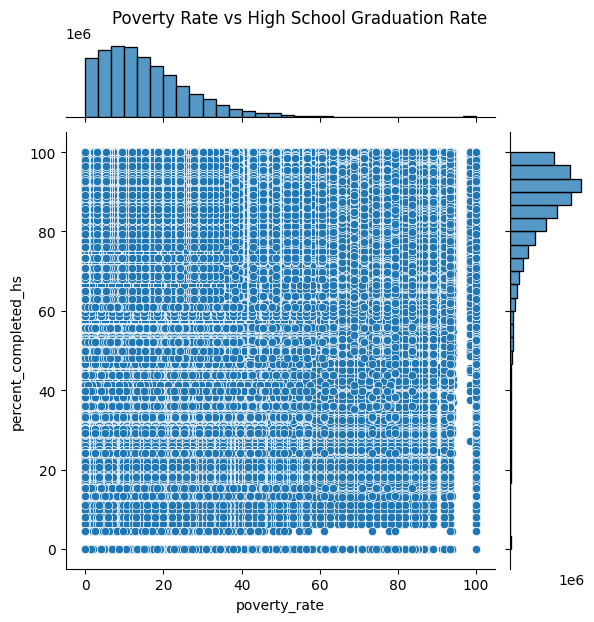

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Merge the dataframes on 'Geographic Area' for scatter plot
merged_df = pd.merge(df_pct_poverty[['Geographic Area', 'poverty_rate']],
                     df_pct_completed_hs[['Geographic Area', 'percent_completed_hs']],
                     on='Geographic Area')

# Convert to numeric again (if necessary)
merged_df['poverty_rate'] = pd.to_numeric(merged_df['poverty_rate'], errors='coerce')
merged_df['percent_completed_hs'] = pd.to_numeric(merged_df['percent_completed_hs'], errors='coerce')

# Drop NaN values
merged_df.dropna(subset=['poverty_rate', 'percent_completed_hs'], inplace=True)

# Plot using Seaborn's jointplot with KDE and scatter
sns.jointplot(
    data=merged_df,
    x='poverty_rate',
    y='percent_completed_hs',
    kind='scatter',  # Scatter plot for data points
    marginal_kws=dict(bins=30, fill=True)  # KDE for marginal plots
)

plt.suptitle("Poverty Rate vs High School Graduation Rate", y=1.03)
plt.show()


#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

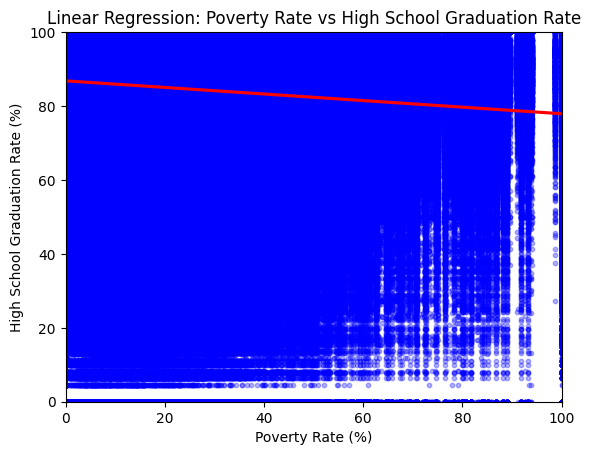

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot using Seaborn's regplot with adjusted marker size and transparency
sns.regplot(
    data=merged_df,
    x='poverty_rate',
    y='percent_completed_hs',
    scatter_kws={'color': 'blue', 's': 10, 'alpha': 0.3},  # Smaller, semi-transparent points
    line_kws={'color': 'red'},  # Color of regression line
    ci=None  # Remove confidence interval
)

plt.title("Linear Regression: Poverty Rate vs High School Graduation Rate")
plt.xlabel("Poverty Rate (%)")
plt.ylabel("High School Graduation Rate (%)")
plt.ylim(0, 100)  # Ensure y-axis is bounded between 0 and 100 for graduation rate
plt.xlim(0, 100)  # Ensure x-axis is bounded between 0 and 100 for poverty rate
plt.show()


# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [ ]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

Geographic area          object
City                     object
share_white              object
share_black              object
share_native_american    object
share_asian              object
share_hispanic           object
dtype: object
  Geographic area             City  share_white  share_black  \
0              AL       Abanda CDP         67.2         30.2   
1              AL   Abbeville city         54.4         41.4   
2              AL  Adamsville city         52.3         44.9   
3              AL     Addison town         99.1          0.1   
4              AL       Akron town         13.2         86.5   

   share_native_american  share_asian  share_hispanic  
0                    0.0          0.0             1.6  
1                    0.1          1.0             3.1  
2                    0.5          0.3             2.3  
3                    0.0          0.1             0.4  
4                    0.0          0.0             0.3  


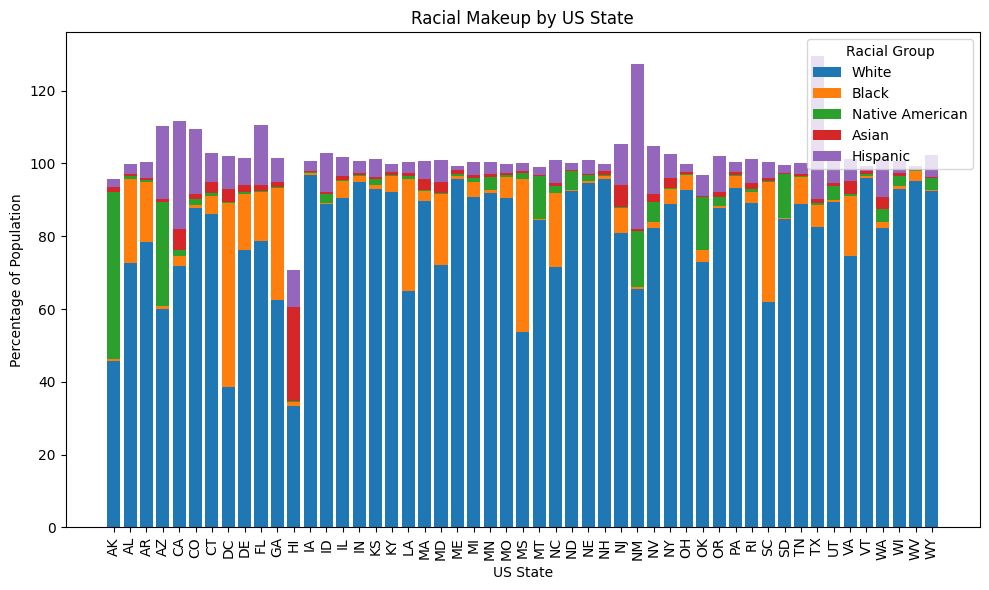

In [14]:
# Step 1: Check data types
print(df_share_race_city.dtypes)

# Step 2: Convert to numeric (if necessary)
# We will coerce errors so that any non-convertible values become NaN, which can be handled later
df_share_race_city['share_white'] = pd.to_numeric(df_share_race_city['share_white'], errors='coerce')
df_share_race_city['share_black'] = pd.to_numeric(df_share_race_city['share_black'], errors='coerce')
df_share_race_city['share_native_american'] = pd.to_numeric(df_share_race_city['share_native_american'], errors='coerce')
df_share_race_city['share_asian'] = pd.to_numeric(df_share_race_city['share_asian'], errors='coerce')
df_share_race_city['share_hispanic'] = pd.to_numeric(df_share_race_city['share_hispanic'], errors='coerce')

# Step 3: Inspect the data again to ensure conversion
print(df_share_race_city.head())

# Step 4: Handle NaN values (e.g., drop rows or fill with 0 or mean)
df_share_race_city = df_share_race_city.dropna(subset=['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic'])

# Step 5: Proceed with the groupby and plotting as before
df_state_race_share = df_share_race_city.groupby('Geographic area').agg({
    'share_white': 'mean',
    'share_black': 'mean',
    'share_native_american': 'mean',
    'share_asian': 'mean',
    'share_hispanic': 'mean'
}).reset_index()

# Step 6: Plot stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each racial category
ax.bar(df_state_race_share['Geographic area'], df_state_race_share['share_white'], label='White')
ax.bar(df_state_race_share['Geographic area'], df_state_race_share['share_black'], bottom=df_state_race_share['share_white'], label='Black')
ax.bar(df_state_race_share['Geographic area'], df_state_race_share['share_native_american'],
       bottom=df_state_race_share['share_white'] + df_state_race_share['share_black'], label='Native American')
ax.bar(df_state_race_share['Geographic area'], df_state_race_share['share_asian'],
       bottom=df_state_race_share['share_white'] + df_state_race_share['share_black'] + df_state_race_share['share_native_american'], label='Asian')
ax.bar(df_state_race_share['Geographic area'], df_state_race_share['share_hispanic'],
       bottom=df_state_race_share['share_white'] + df_state_race_share['share_black'] + df_state_race_share['share_native_american'] + df_state_race_share['share_asian'], label='Hispanic')

# Step 7: Labeling and Display
ax.set_xlabel('US State')
ax.set_ylabel('Percentage of Population')
ax.set_title('Racial Makeup by US State')
ax.legend(loc='upper right', title="Racial Group")
plt.xticks(rotation=90)  # Rotate state labels for better readability
plt.tight_layout()

plt.show()


# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [10]:
import plotly.graph_objects as go

# Calculate the count of fatalities by race
race_counts = df_fatalities['race'].value_counts()

# Create a donut chart
fig = go.Figure(data=[go.Pie(labels=race_counts.index,
                             values=race_counts.values,
                             hole=.5)])

# Customize the layout
fig.update_layout(title="Fatalities by Race",
                  width=600, height=600)

# Show the chart
fig.show()



# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [15]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


<ipython-input-16-802c175880c8>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




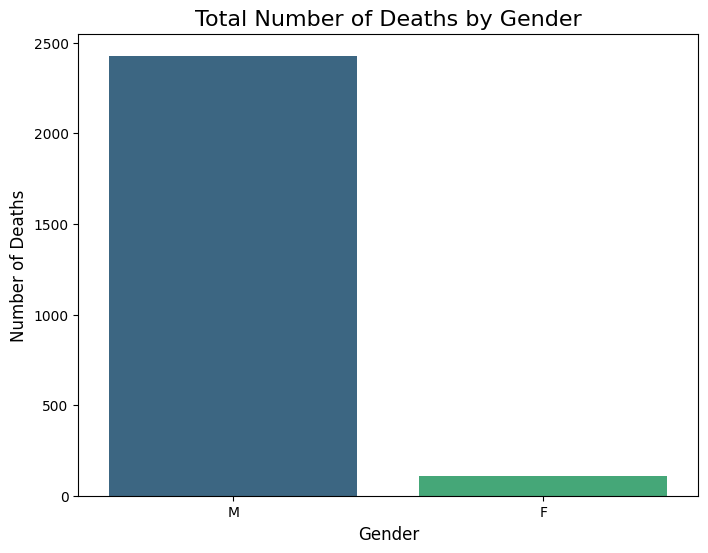

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'gender' and count the occurrences of each gender
gender_counts = df_fatalities['gender'].value_counts()

# Create a bar plot to compare the total number of deaths by gender
plt.figure(figsize=(8,6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')

# Set plot labels and title
plt.title('Total Number of Deaths by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Deaths', fontsize=12)

# Display the plot
plt.show()


# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

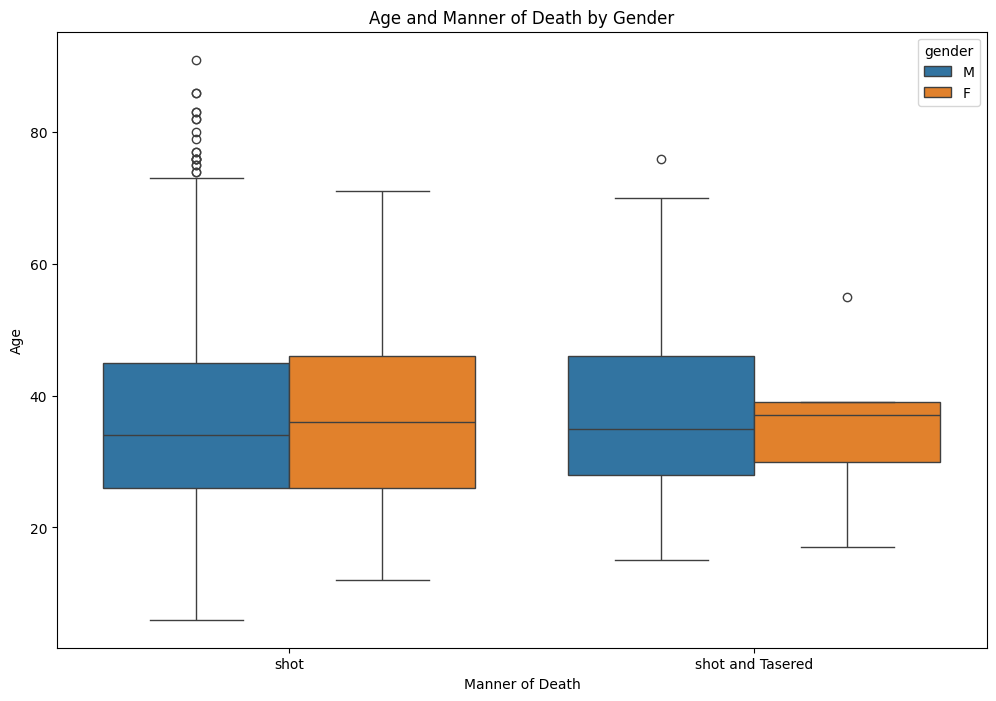

In [17]:
# Create a box plot showing the age and manner of death, broken out by gender
plt.figure(figsize=(12, 8))
sns.boxplot(x='manner_of_death', y='age', hue='gender', data=df_fatalities)
plt.title('Age and Manner of Death by Gender')
plt.xlabel('Manner of Death')
plt.ylabel('Age')
plt.show()


In [20]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [23]:
import plotly.express as px

# Calculate the percentage of police killings where people were armed
armed_percentage = (df_fatalities['armed'].value_counts(normalize=True) * 100).round(2)

# Create a pie chart to visualize the percentage of armed vs unarmed individuals
fig = px.pie(
    values=df_fatalities['armed'].value_counts(),
    names=df_fatalities['armed'].value_counts().index,
    title='Percentage of People Killed by Police: Armed vs. Unarmed',
    hole=0.3
)

# Show the chart
fig.show()

# Find the most frequent value in the 'armed' column
most_frequent_armed = df_fatalities['armed'].value_counts().index[0]

# Print the percentage of people killed by police who were armed with the most frequent item
print(f"Percentage of people killed by police who were armed with {most_frequent_armed}: {armed_percentage[most_frequent_armed]}%")
# Print the percentage of people killed by police who were unarmed
# Assuming 'unarmed' is represented by a specific value in the 'armed' column (e.g., 'unarmed')
print(f"Percentage of people killed by police who were unarmed: {armed_percentage['unarmed']}%") # You'll need to replace 'unarmed' with the actual value representing unarmed in your data

Percentage of people killed by police who were armed with gun: 55.34%
Percentage of people killed by police who were unarmed: 6.77%


In [21]:

# Create a bar chart to show the distribution of weapons used
weapon_counts = df_fatalities['armed'].value_counts()
fig = px.bar(
    x=weapon_counts.index,
    y=weapon_counts.values,
    labels={'x': 'Armed Status', 'y': 'Count'},
    title='Distribution of Weapons Used in Police Killings'
)
fig.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [24]:
# Calculate the percentage of people killed under 25 years old
under_25_count = df_fatalities[df_fatalities['age'] < 25].shape[0]
total_count = df_fatalities.shape[0]
percentage_under_25 = (under_25_count / total_count) * 100

print(f"Percentage of people killed under 25 years old: {percentage_under_25:.2f}%")


Percentage of people killed under 25 years old: 17.75%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

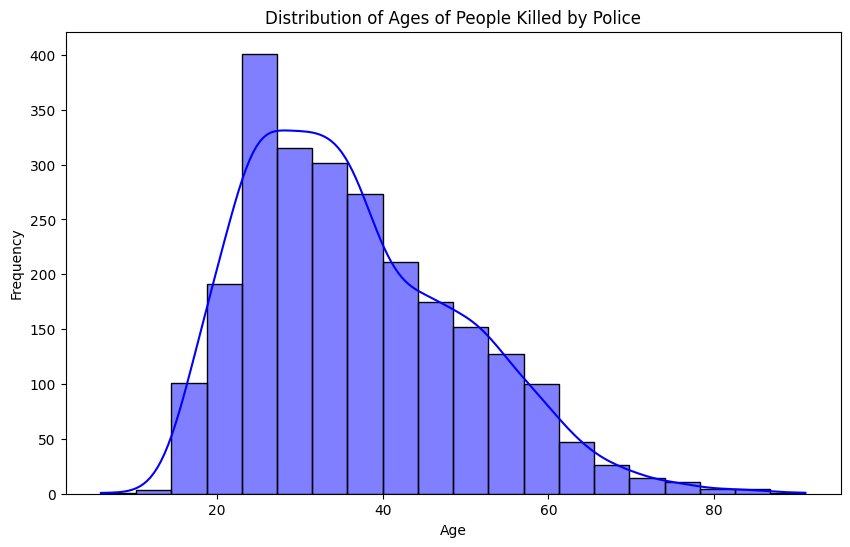

In [25]:
# Create a histogram and KDE plot
plt.figure(figsize=(10, 6))
sns.histplot(df_fatalities['age'], kde=True, bins=20, color='blue')
plt.title('Distribution of Ages of People Killed by Police')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Create a seperate KDE plot for each race. Is there a difference between the distributions?

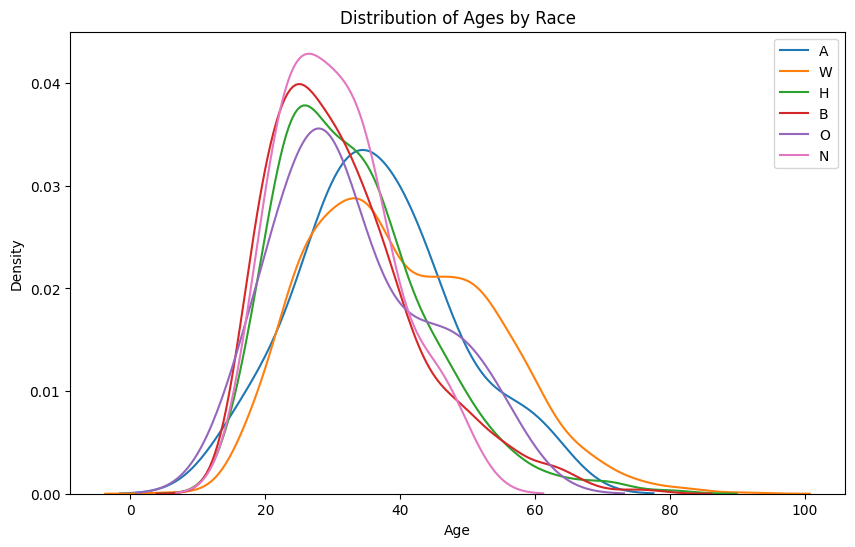

In [26]:
# Create a separate KDE plot for each race
plt.figure(figsize=(10, 6))
for race in df_fatalities['race'].unique():
  sns.kdeplot(df_fatalities[df_fatalities['race'] == race]['age'], label=race)

plt.title('Distribution of Ages by Race')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()


# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [27]:
# Calculate the count of fatalities by race
race_counts = df_fatalities['race'].value_counts()

# Create a bar chart
fig = px.bar(
    x=race_counts.index,
    y=race_counts.values,
    labels={'x': 'Race', 'y': 'Number of Fatalities'},
    title='Total Number of People Killed by Police by Race'
)

# Show the chart
fig.show()


# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [28]:

# Calculate the percentage of people killed by police with a mental illness
mental_illness_count = df_fatalities[df_fatalities['signs_of_mental_illness'] == True].shape[0]
total_count = df_fatalities.shape[0]
percentage_mental_illness = (mental_illness_count / total_count) * 100

print(f"Percentage of people killed by police with a mental illness: {percentage_mental_illness:.2f}%")


Percentage of people killed by police with a mental illness: 24.97%


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [29]:
# Calculate the count of fatalities by city
city_counts = df_fatalities['city'].value_counts()

# Select the top 10 cities
top_10_cities = city_counts.head(10)

# Create a bar chart
fig = px.bar(
    x=top_10_cities.index,
    y=top_10_cities.values,
    labels={'x': 'City', 'y': 'Number of Fatalities'},
    title='Top 10 Cities with the Most Police Killings'
)

# Show the chart
fig.show()

# Print the top 10 cities with the most police killings
print("Top 10 cities with the most police killings:")
print(top_10_cities)



Top 10 cities with the most police killings:
city
Los Angeles    39
Phoenix        31
Houston        27
Chicago        25
Las Vegas      21
San Antonio    20
Columbus       19
Austin         18
Miami          18
St. Louis      15
Name: count, dtype: int64


# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [30]:
# Calculate the count of fatalities by city
city_counts = df_fatalities['city'].value_counts()

# Select the top 10 cities
top_10_cities = city_counts.head(10).index

# Filter the dataframe to include only the top 10 cities
top_10_cities_df = df_fatalities[df_fatalities['city'].isin(top_10_cities)]

# Calculate the share of each race in the top 10 cities
race_share_top_10 = top_10_cities_df['race'].value_counts(normalize=True) * 100

# Calculate the rate of death by race for each city
rate_of_death_by_race = top_10_cities_df.groupby(['city', 'race'])['race'].count().unstack().fillna(0)

# Calculate the total number of deaths in each city
total_deaths_per_city = rate_of_death_by_race.sum(axis=1)

# Calculate the rate of death by race per city
rate_of_death_by_race = rate_of_death_by_race.div(total_deaths_per_city, axis=0) * 100

# Print the results
print("Share of each race in the top 10 cities:")
print(race_share_top_10)
print("\nRate of death by race for each city:")
print(rate_of_death_by_race)


Share of each race in the top 10 cities:
race
B    40.277778
H    28.703704
W    27.777778
N     1.851852
A     0.925926
O     0.462963
Name: proportion, dtype: float64

Rate of death by race for each city:
race                A          B          H          N         O          W
city                                                                       
Austin       0.000000  16.666667  11.111111   0.000000  0.000000  72.222222
Chicago      0.000000  87.500000   4.166667   0.000000  0.000000   8.333333
Columbus     0.000000  61.111111   0.000000   0.000000  5.555556  33.333333
Houston      3.846154  57.692308  23.076923   3.846154  0.000000  11.538462
Las Vegas    0.000000  17.647059  29.411765   0.000000  0.000000  52.941176
Los Angeles  2.777778  27.777778  52.777778   0.000000  0.000000  16.666667
Miami        0.000000  47.058824  35.294118   0.000000  0.000000  17.647059
Phoenix      0.000000   7.142857  39.285714  10.714286  0.000000  42.857143
San Antonio  0.000000  16.666667 

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [31]:
# Calculate the count of fatalities by state
state_counts = df_fatalities['state'].value_counts()

# Create a choropleth map
fig = px.choropleth(
    locations=state_counts.index,
    locationmode='USA-states',
    color=state_counts.values,
    scope='usa',
    color_continuous_scale='reds',
    title='Police Killings by US State'
)

# Show the map
fig.show()


# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

<ipython-input-32-0e706c0b885c>:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



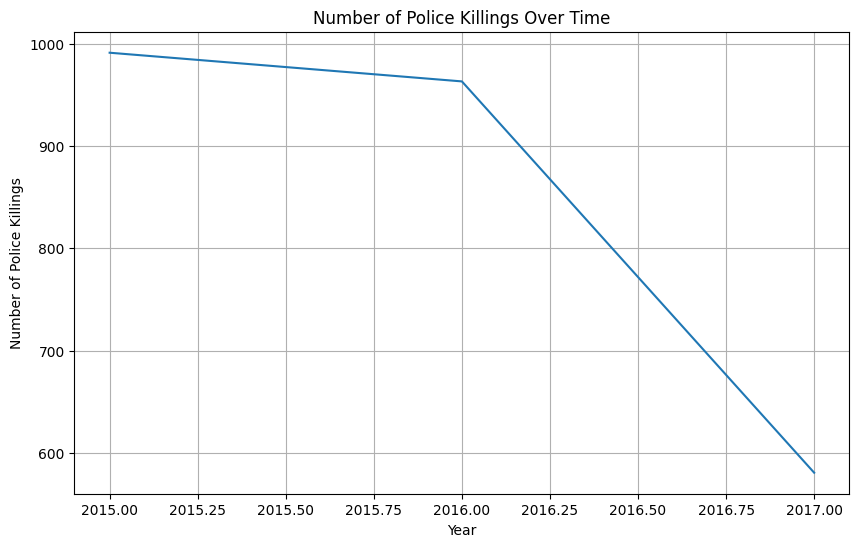

In [32]:
# Convert the 'date' column to datetime objects
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])

# Extract the year from the 'date' column
df_fatalities['year'] = df_fatalities['date'].dt.year

# Group by year and count the number of fatalities
killings_by_year = df_fatalities.groupby('year')['id'].count()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(killings_by_year.index, killings_by_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Police Killings')
plt.title('Number of Police Killings Over Time')
plt.grid(True)
plt.show()


# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).